In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("undersampled_data.csv")
df

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantCountry,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,USA,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,USA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,USA,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,USA,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,USA,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,$193.24,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,51694.676895,5921.0,Yes
1740,1999.0,3.0,2020.0,1.0,26.0,$221.96,Swipe Transaction,Abrils Wholesale,Saint Louis,USA,63146.000000,5300.0,Yes
1741,1999.0,3.0,2020.0,1.0,26.0,$26.69,Swipe Transaction,Abrils Wholesale,Saint Louis,USA,63146.000000,5300.0,Yes
1742,1999.0,3.0,2020.0,1.0,26.0,$103.95,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,USA,63146.000000,5812.0,Yes


In [4]:
df["target"].value_counts()

No     872
Yes    872
Name: target, dtype: int64

In [5]:
# Select the 'Amount' column from the DataFrame
# Replace dollar signs and commas with an empty string using regex
# Convert the cleaned strings to float
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [6]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# List of columns to be encoded
col = ['UseChip', 'MerchantName', 'MerchantCity', 'MerchantCountry','target']

# Loop through each column in the list
for i in col:
    # Apply LabelEncoder to the column and transform the data into integer values
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
independent=df[['Year', 'Month', 'UseChip','Amount',
       'MerchantName', 'MerchantCity', 'MerchantCountry','MCC']]

dependent=df[['target']]
independent

,Year,Month,UseChip,Amount,MerchantName,MerchantCity,MerchantCountry,MCC
0,2015.0,7.0,2,21.42,383,522,15,7832.0
1,2016.0,5.0,0,76.99,318,270,15,5300.0
2,2012.0,11.0,2,2.19,529,230,15,5411.0
3,2019.0,5.0,0,45.73,529,171,15,5411.0
4,2018.0,1.0,0,1.25,153,68,15,5499.0
...,...,...,...,...,...,...,...,...
1739,2013.0,1.0,2,193.24,422,520,6,5921.0
1740,2020.0,1.0,2,221.96,10,470,15,5300.0
1741,2020.0,1.0,2,26.69,10,470,15,5300.0
1742,2020.0,1.0,0,103.95,160,470,15,5812.0


In [8]:
independent['MerchantName'].unique()

array([383, 318, 529, 153, 402, 439, 534, 519, 279, 314, 427, 556, 564,
       405, 297, 102, 452, 528, 431, 199, 412, 535, 154, 101, 463, 375,
       116,  81,  75, 312, 471, 236, 435, 225, 232, 287, 230, 541, 414,
       226, 183, 480, 129, 151, 175, 416, 465, 503, 449,  86, 308, 162,
       419, 386, 267, 540, 140, 544, 126, 473,  79, 161, 259, 321, 561,
       442, 445, 447, 575, 189, 223, 573, 494, 273, 404, 122, 260, 413,
        90, 394, 141, 353, 362, 231, 388, 457,  77, 372, 327, 574, 178,
       441,  68, 254, 184, 139, 127, 504, 187, 124, 233, 440, 131, 145,
       539, 281, 221, 448, 344, 527,  85, 212, 194, 258, 454, 172, 479,
        97, 374, 509, 176, 263, 173, 109, 113,  69, 531, 147, 456, 222,
       241,  61, 220, 179,  82, 399, 235, 489, 549, 250, 240,  84, 174,
       123, 238, 378, 470, 492, 496, 213, 301, 142, 545,  18,  37, 395,
       269, 476, 530, 365, 510, 379, 364, 261,  54,  49, 351, 296, 415,
       294, 195, 347, 429, 264, 418, 245, 443, 483, 247, 331, 44

In [9]:
dependent

,target
0,0
1,0
2,0
3,0
4,0
...,...
1739,1
1740,1
1741,1
1742,1


In [48]:
#split into training set and test

X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.40,random_state=42)

In [49]:
X_test.shape

(698, 8)

In [50]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=500, criterion="entropy")
}

for model_name, model in models.items():
    model.fit(X_train, Y_train.values.ravel())  # Train model
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred)
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(Y_train, y_train_pred)
    model_train_recall = recall_score(Y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred)
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(Y_test, y_test_pred)
    model_test_recall = recall_score(Y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred)
    
    # Print results
    print(f"{model_name}")
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.4f}")
    print('----------------------------------------------------')
    print('Model performance for Test set')
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- Roc Auc Score: {model_test_rocauc_score:.4f}")
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.7084
- F1 score: 0.7030
- Precision: 0.7953
- Recall: 0.5717
- Roc Auc Score: 0.7103
----------------------------------------------------
Model performance for Test set
- Accuracy: 0.7163
- F1 score: 0.7105
- Precision: 0.7880
- Recall: 0.5760
- Roc Auc Score: 0.7136


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------------------
Model performance for Test set
- Accuracy: 0.9241
- F1 score: 0.9241
- Precision: 0.9140
- Recall: 0.9327
- Roc Auc Score: 0.9242


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------------------
Model performance for Test set
- Accuracy: 0.9499
- F1 score: 0.9498
- Precision: 0.9582
- Recall: 0.9386
- Roc Auc Score: 0.94

In [57]:
y_pred=classifier.predict(X_test)


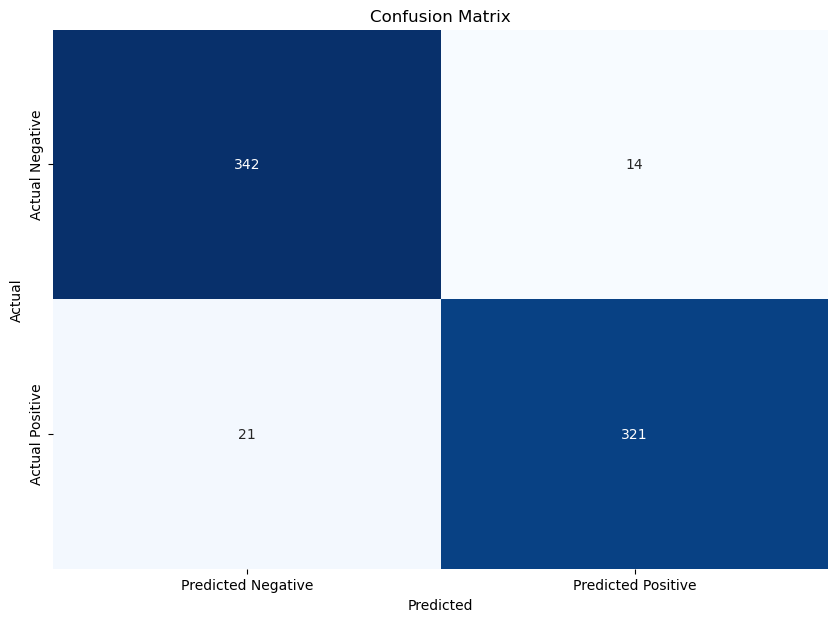

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       356
           1       0.96      0.94      0.95       342

    accuracy                           0.95       698
   macro avg       0.95      0.95      0.95       698
weighted avg       0.95      0.95      0.95       698



In [52]:
# Assuming Random Forest model is already trained
classifier = models["Random Forest"]

y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test.values.ravel(), y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

clf_report = classification_report(Y_test.values.ravel(), y_pred)
print(clf_report)


In [53]:
cm

array([[342,  14],
       [ 21, 321]], dtype=int64)

In [56]:
import joblib

# Assuming you have already trained a model named 'model'
# Save the model to a file
joblib.dump(classifier, 'frauddetection.pkl')


['frauddetection.pkl']